## This notebook will be mainly used for the data science capstone project ##

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
data=pd.read_csv('D:\datasets\Data-Collisions.csv')

C:\Users\ThisPc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
data=data.set_index('OBJECTID')

In [6]:
data.head()

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,-122.323148,47.703140,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,1,-122.347294,47.647172,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
3,1,-122.334540,47.607871,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
4,1,-122.334803,47.604803,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
5,2,-122.306426,47.545739,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
data.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

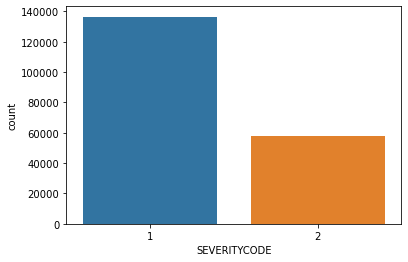

In [8]:
sns.countplot(x="SEVERITYCODE",data=data)

In [9]:
data=data.drop(['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'],axis=1)

In [10]:
data=data.drop(['SEVERITYCODE.1','INCKEY','COLDETKEY','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','REPORTNO','LOCATION',
                'ST_COLCODE','ST_COLDESC','SDOTCOLNUM','SEGLANEKEY','CROSSWALKKEY','PEDCOUNT','PEDCYLCOUNT',
                'UNDERINFL','JUNCTIONTYPE','X','Y','PERSONCOUNT','VEHCOUNT'],axis=1)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 1 to 219547
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   194673 non-null  int64 
 1   STATUS         194673 non-null  object
 2   ADDRTYPE       192747 non-null  object
 3   SEVERITYDESC   194673 non-null  object
 4   COLLISIONTYPE  189769 non-null  object
 5   WEATHER        189592 non-null  object
 6   ROADCOND       189661 non-null  object
 7   LIGHTCOND      189503 non-null  object
 8   HITPARKEDCAR   194673 non-null  object
dtypes: int64(1), object(8)
memory usage: 19.9+ MB


In [12]:
data.isnull().sum()

SEVERITYCODE        0
STATUS              0
ADDRTYPE         1926
SEVERITYDESC        0
COLLISIONTYPE    4904
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
HITPARKEDCAR        0
dtype: int64

In [13]:
sc2=data.loc[data.SEVERITYCODE==2]

In [14]:
sc1=data.loc[data.SEVERITYCODE==1].sample(n=58188, random_state=12)

In [15]:
normdata=pd.concat([sc1,sc2])

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

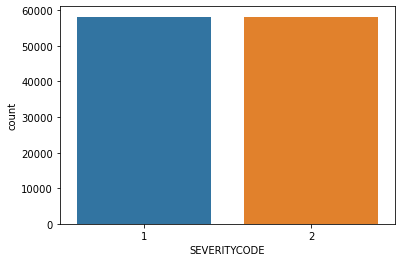

In [16]:
sns.countplot(x="SEVERITYCODE",data=normdata)

In [17]:
col=['STATUS','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']

In [18]:
class fill(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X['ADDRTYPE']=X['ADDRTYPE'].fillna(X['ADDRTYPE'].mode()[0])
        X['COLLISIONTYPE']=X['COLLISIONTYPE'].fillna(X['COLLISIONTYPE'].mode()[0])
        X['WEATHER']=X['WEATHER'].fillna(X['WEATHER'].mode()[0])
        X['ROADCOND']=X['ROADCOND'].fillna(X['ROADCOND'].mode()[0])
        X['LIGHTCOND']=X['LIGHTCOND'].fillna(X['LIGHTCOND'].mode()[0])
        return X

In [19]:
class factorize(BaseEstimator,TransformerMixin):
    def __init__(self,column):
        self.column=column
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        for i in self.column:
            X[i]=pd.factorize(X[i])[0]
        return X

In [20]:
feature=Pipeline([
    ('fill',fill()),
    ('factorize',factorize(col))  
])

In [75]:
pipe=Pipeline([
    ('feature',feature),
    ('rfr',RandomForestClassifier(n_estimators=200,max_depth=10,random_state=11))
])

In [76]:
Xd=normdata.drop(['SEVERITYCODE'],axis=1)
yd=normdata[['SEVERITYCODE']]

In [77]:
X_train,X_test,y_train,y_test=train_test_split(Xd,yd,test_size=0.2,random_state=334)

In [78]:
pipe.fit(X_train,y_train)

C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Pipeline(steps=[('feature',
                 Pipeline(steps=[('fill', fill()),
                                 ('factorize',
                                  factorize(column=['STATUS', 'ADDRTYPE',
                                                    'SEVERITYDESC',
                                                    'COLLISIONTYPE', 'WEATHER',
                                                    'ROADCOND', 'LIGHTCOND',
                                                    'HITPARKEDCAR']))])),
                ('rfr',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=11))])

In [79]:
pipe.score(X_train,y_train)

C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

1.0

In [80]:
ypred=pipe.predict(X_test)

C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ThisPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [81]:
confusion_matrix(y_test,ypred)

array([[11687,     0],
       [    0, 11589]], dtype=int64)